This aims to plot James' resolution figures.

In [51]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import pickle

In [11]:
f_a = pickle.load(open('grating_f_a.pkl', 'rb'))
lengths = f_a['lengths']
output = f_a['output']
harmonics = f_a['harmonics']

In [10]:
lengths
output.shape

(25, 9)

In [23]:
base_frequency = 5

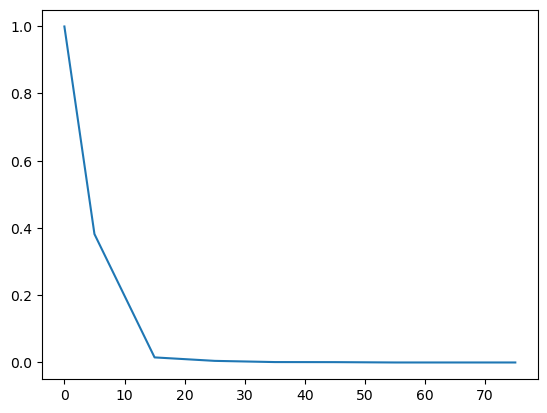

In [24]:
plt.plot(harmonics*base_frequency, output[15])

Text(0.5, 0, 'Distance from focal point (mm)')

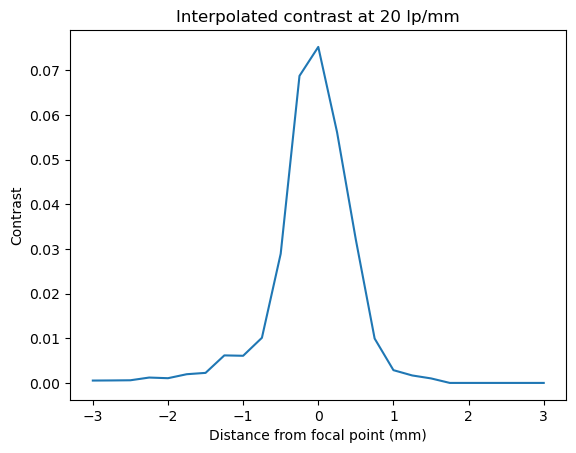

In [37]:
interp_location = 20
interpolated_values = []
for i in range(len(lengths)):
    interpolated_values.append(np.interp(20, harmonics*base_frequency, output[i]))

plt.plot(lengths, interpolated_values)
plt.title('Interpolated contrast at 20 lp/mm')
plt.ylabel('Contrast')
plt.xlabel('Distance from focal point (mm)')

In [ ]:
scipy.interpolate

TypeError: Dimensions of C (25, 9) are incompatible with X (25) and/or Y (9); see help(pcolormesh)

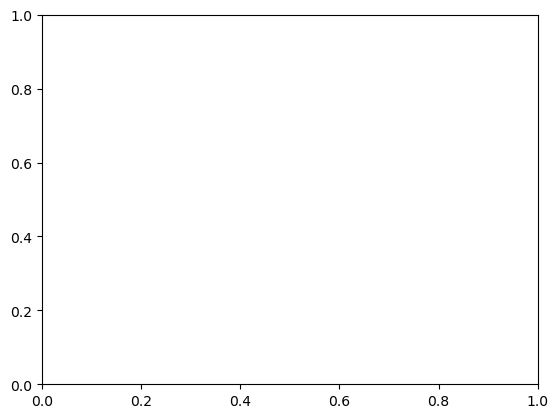

In [48]:
X,Y = np.meshgrid(lengths, base_frequency*harmonics)
plt.pcolormesh(Y,X, output)
plt.colorbar()

In [125]:
sampled_lengths = np.linspace(-3, 3, 100)
sampled_harmonics = np.linspace(0, 15, 100)
xg, yg = np.meshgrid(sampled_harmonics, sampled_lengths)
interp = sp.interpolate.RegularGridInterpolator((lengths, harmonics), output)

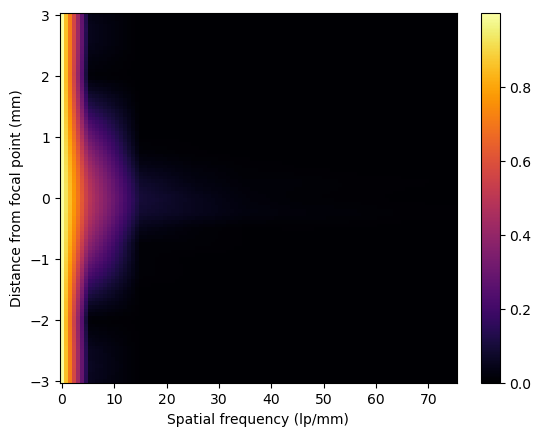

In [126]:
plt.pcolormesh(xg.T*base_frequency, yg.T, (interp((yg, xg)).T), cmap='inferno')
plt.xlabel('Spatial frequency (lp/mm)')
plt.ylabel('Distance from focal point (mm)')
plt.colorbar()
plt.title('')

In [114]:
yg

array([[-3.        , -3.        , -3.        , ..., -3.        ,
        -3.        , -3.        ],
       [-2.87755102, -2.87755102, -2.87755102, ..., -2.87755102,
        -2.87755102, -2.87755102],
       [-2.75510204, -2.75510204, -2.75510204, ..., -2.75510204,
        -2.75510204, -2.75510204],
       ...,
       [ 2.75510204,  2.75510204,  2.75510204, ...,  2.75510204,
         2.75510204,  2.75510204],
       [ 2.87755102,  2.87755102,  2.87755102, ...,  2.87755102,
         2.87755102,  2.87755102],
       [ 3.        ,  3.        ,  3.        , ...,  3.        ,
         3.        ,  3.        ]])

In [99]:
xg.shape

(30, 50)